In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [2]:
# loading data
csvpath = Path('../Project-03/combined_df.csvmeStats.csv')
teamstats_df = pd.read_csv(csvpath)

In [3]:
# dropping unneeded columns
# subsequent analysis dropped '+/-' and 'PTS' columns
teamstats_df = teamstats_df.drop(columns=['TEAM','GAMEDATE','+/-','PTS','REB'])

In [4]:
# converting 'H/A' to 0/1's
teamstats_df['H/A'] = teamstats_df['H/A'].apply(lambda x: 1 if x=="vs" else 0)
teamstats_df[:5]

,TEAM1,H/A,TEAM2,W/L,MIN,FGM,FGA,FG%,3PM,3PA,...,FTM,FTA,FT%,OREB,DREB,AST,TOV,STL,BLK,PF
0,ATL,1,IND,W,48,45,92,48.9,13,32,...,26,34,76.5,14,37,20,10,8,7,19
1,CHA,1,POR,W,48,39,83,47.0,18,43,...,13,17,76.5,7,39,26,14,6,8,25
2,NOP,0,NYK,L,53,41,101,40.6,6,27,...,24,30,80.0,20,32,25,13,6,4,16
3,MIA,1,BKN,W,48,38,87,43.7,16,39,...,17,21,81.0,16,37,28,17,9,1,13
4,POR,0,CHA,L,48,36,91,39.6,10,36,...,19,28,67.9,13,34,18,9,7,3,17


In [5]:
# converting 'W/L' to 0/1's
teamstats_df['W/L']=teamstats_df['W/L'].apply(lambda x: 1 if x=="W" else 0)
teamstats_df[:5]

,TEAM1,H/A,TEAM2,W/L,MIN,FGM,FGA,FG%,3PM,3PA,...,FTM,FTA,FT%,OREB,DREB,AST,TOV,STL,BLK,PF
0,ATL,1,IND,1,48,45,92,48.9,13,32,...,26,34,76.5,14,37,20,10,8,7,19
1,CHA,1,POR,1,48,39,83,47.0,18,43,...,13,17,76.5,7,39,26,14,6,8,25
2,NOP,0,NYK,0,53,41,101,40.6,6,27,...,24,30,80.0,20,32,25,13,6,4,16
3,MIA,1,BKN,1,48,38,87,43.7,16,39,...,17,21,81.0,16,37,28,17,9,1,13
4,POR,0,CHA,0,48,36,91,39.6,10,36,...,19,28,67.9,13,34,18,9,7,3,17


In [6]:
# dropping unneeded columns
# subsequent analysis dropped '+/-' and 'PTS' columns
teamstats_df = teamstats_df.drop(columns=['TEAM1','TEAM2'])

In [7]:
#new_teamstats_df = pd.get_dummies(teamstats_df, columns=['TEAM1','TEAM2']).head()


In [8]:
#new_teamstats_df.head()

In [9]:
# defining 'W/L' column as feature set
X = teamstats_df.copy()
X.drop('W/L', axis=1, inplace=True)
X.head(16)

,H/A,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,AST,TOV,STL,BLK,PF
0,1,48,45,92,48.9,13,32,40.6,26,34,76.5,14,37,20,10,8,7,19
1,1,48,39,83,47.0,18,43,41.9,13,17,76.5,7,39,26,14,6,8,25
2,0,53,41,101,40.6,6,27,22.2,24,30,80.0,20,32,25,13,6,4,16
3,1,48,38,87,43.7,16,39,41.0,17,21,81.0,16,37,28,17,9,1,13
4,0,48,36,91,39.6,10,36,27.8,19,28,67.9,13,34,18,9,7,3,17
5,0,48,37,82,45.1,14,33,42.4,18,21,85.7,9,37,22,23,6,8,19
6,0,48,36,88,40.9,17,45,37.8,16,21,76.2,6,31,27,11,6,7,21
7,1,48,41,91,45.1,11,32,34.4,17,19,89.5,9,27,28,15,10,5,19
8,1,48,37,96,38.5,17,38,44.7,21,24,87.5,16,31,23,15,9,5,15
9,0,48,45,92,48.9,10,32,31.3,17,20,85.0,8,33,33,12,7,5,27


In [10]:
teamstats_df.info('include=all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25476 entries, 0 to 25475
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   H/A     25476 non-null  int64  
 1   W/L     25476 non-null  int64  
 2   MIN     25476 non-null  int64  
 3   FGM     25476 non-null  int64  
 4   FGA     25476 non-null  int64  
 5   FG%     25476 non-null  float64
 6   3PM     25476 non-null  int64  
 7   3PA     25476 non-null  int64  
 8   3P%     25476 non-null  float64
 9   FTM     25476 non-null  int64  
 10  FTA     25476 non-null  int64  
 11  FT%     25476 non-null  float64
 12  OREB    25476 non-null  int64  
 13  DREB    25476 non-null  int64  
 14  AST     25476 non-null  int64  
 15  TOV     25476 non-null  int64  
 16  STL     25476 non-null  int64  
 17  BLK     25476 non-null  int64  
 18  PF      25476 non-null  int64  
dtypes: float64(3), int64(16)
memory usage: 3.7 MB


In [11]:
# defining target vector
#y=teamstats_df['W/L'].values.reshape(-1,1)
# defining target vector
y=teamstats_df['W/L'].ravel()
y[:5]

array([1, 1, 0, 1, 0], dtype=int64)

In [12]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [13]:
# Creating StandardScaler instance
#scaler = StandardScaler()

# Fitting Standard Scaller
#X_scaler = scaler.fit(X_train)

In [14]:
# Scaling data
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)

In [15]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=30, random_state=78)

In [16]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)
#rf_model = rf_model.fit(X_train_scaled, y_train)

In [17]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test)
#predictions = rf_model.predict(X_test_scaled)

In [18]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [19]:
 # Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,2598,620
Actual 1,702,2449


Accuracy Score : 0.7924320929502277
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      3218
           1       0.80      0.78      0.79      3151

    accuracy                           0.79      6369
   macro avg       0.79      0.79      0.79      6369
weighted avg       0.79      0.79      0.79      6369



In [20]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_

In [21]:
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.16167257981825978, 'FG%'),
 (0.13210657101800763, 'DREB'),
 (0.08214742572783056, '3P%'),
 (0.06816620623054165, 'FGM'),
 (0.052684580353817304, 'TOV'),
 (0.05103775854871372, 'STL'),
 (0.04879884998052385, 'FTM'),
 (0.046943091570439036, 'FT%'),
 (0.04668768278912878, 'PF'),
 (0.04630202370542568, 'AST'),
 (0.04534550973943174, 'OREB'),
 (0.043918278739275264, 'FTA'),
 (0.04197398690302602, 'FGA'),
 (0.04006190816878393, '3PA'),
 (0.0382375536609416, 'BLK'),
 (0.032165639948986656, '3PM'),
 (0.01577036526928373, 'H/A'),
 (0.005979987827583102, 'MIN')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

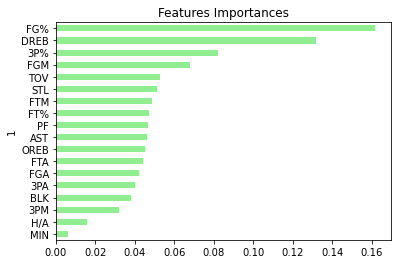

In [22]:
 # Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)